## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 
import seaborn as sn

# linear modelling
import statsmodels.api as sm
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

# metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

# Display the data table for preview
mouse_metadata.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
5,s508,Ramicane,Male,1,17
6,f966,Capomulin,Male,16,17
7,m546,Ramicane,Male,18,16
8,z578,Ramicane,Male,11,16
9,j913,Ramicane,Female,4,17


In [2]:
study_results.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0
5,h246,0,45.0,0
6,p189,0,45.0,0
7,n923,0,45.0,0
8,q119,0,45.0,0
9,f993,0,45.0,0


In [3]:
combined = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")
combined.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


In [4]:
combined.Timepoint.max()

45

In [5]:
# Checking the number of mice.
# combined.Mouse_ID.len()
# len(combined.'Mouse ID')
# df["Mouse ID"].nunique()
combined["Mouse ID"].nunique()
# combined.count

249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicates = combined.groupby(["Mouse ID", "Timepoint"]).size()
duplicates = duplicates.reset_index()
duplicates.columns = ["Mouse ID", "Timepoint", "Count"]

duplicates.head(10)

,Mouse ID,Timepoint,Count
0,a203,0,1
1,a203,5,1
2,a203,10,1
3,a203,15,1
4,a203,20,1
5,a203,25,1
6,a203,30,1
7,a203,35,1
8,a203,40,1
9,a203,45,1


In [7]:
# confirm duplications as i thought it was initialy A203

duplicates.sort_values(by="Count", ascending=False).head(10)

,Mouse ID,Timepoint,Count
590,g989,20,2
589,g989,15,2
588,g989,10,2
587,g989,5,2
586,g989,0,2
0,a203,0,1
1264,q633,0,1
1260,q610,20,1
1261,q610,25,1
1262,q610,30,1


In [8]:


combined2 = combined.copy()
combined2["Key"] = combined2["Mouse ID"] + "_" + combined2["Timepoint"].astype(str)
combined2.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Key
0,b128,0,45.0,0,Capomulin,Female,9,22,b128_0
1,f932,0,45.0,0,Ketapril,Male,15,29,f932_0
2,g107,0,45.0,0,Ketapril,Female,2,29,g107_0
3,a457,0,45.0,0,Ketapril,Female,11,30,a457_0
4,c819,0,45.0,0,Ketapril,Male,21,25,c819_0
5,h246,0,45.0,0,Ketapril,Male,13,30,h246_0
6,p189,0,45.0,0,Ketapril,Male,8,28,p189_0
7,n923,0,45.0,0,Ketapril,Male,19,30,n923_0
8,q119,0,45.0,0,Ketapril,Male,17,30,q119_0
9,f993,0,45.0,0,Naftisol,Male,21,28,f993_0


In [9]:
combined2.Key.value_counts().head(10)

g989_5     2
g989_20    2
g989_15    2
g989_10    2
g989_0     2
c402_40    1
a685_35    1
k510_5     1
a699_25    1
g791_25    1
Name: Key, dtype: int64

In [10]:
# Optional: Get all the data for the duplicate mouse ID. 

mask = combined["Mouse ID"] == "g989"
combined.loc[mask]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# use mask to select particular data within the Mouse ID "key", and then the specific ID of "g989"
# then create a "cleaned" dataframe that does not have the duplicate, through the reset_index(drop=true)
mask = combined["Mouse ID"] != "g989"
combined_clean = combined.loc[mask].reset_index(drop=True)
combined_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [12]:
# Checking the number of mice in the clean DataFrame.
combined_clean["Mouse ID"].nunique()

248

In [86]:
capo_only_df = combined_clean.loc[combined_clean["Drug Regimen"] == "Capomulin"]
capo_only_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
224,j246,0,45.000000,0,Capomulin,Female,21,21
225,r554,0,45.000000,0,Capomulin,Female,8,17
226,s185,0,45.000000,0,Capomulin,Female,3,17
227,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1841,s710,45,40.728578,1,Capomulin,Female,1,23
1846,j119,45,38.125164,1,Capomulin,Female,7,23
1865,i557,45,47.685963,1,Capomulin,Female,1,24
1875,r944,45,41.581521,2,Capomulin,Male,12,25


## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.


drugs1 = combined_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
drugs2 = combined_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
drugs3 = combined_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
drugs4 = combined_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
drugs5 = combined_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
drugs6 = combined_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].max()

regimen = pd.DataFrame([drugs1, drugs2, drugs3, drugs4, drugs5, drugs6]).T
regimen.columns = ["Tumor_Mean", "Tumor_Median", "Tumor_Var", "Tumor_STD", "Tumor_SEM", "Tumor_Max"]
regimen

,Tumor_Mean,Tumor_Median,Tumor_Var,Tumor_STD,Tumor_SEM,Tumor_Max
Drug Regimen,,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346,48.158209
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821,68.923185
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236,72.226731
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860,78.567014
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466,76.668817
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331,73.212939
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332,72.455421
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955,47.622816
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111,75.123690


In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
combined_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [15]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

tested = combined_clean.groupby("Drug Regimen")["Mouse ID"].nunique().reset_index()
tested.rename(columns={"Mouse ID": "Mouse_Count"}, inplace=True)
tested

,Drug Regimen,Mouse_Count
0,Capomulin,25
1,Ceftamin,25
2,Infubinol,25
3,Ketapril,25
4,Naftisol,25
5,Placebo,25
6,Propriva,24
7,Ramicane,25
8,Stelasyn,24
9,Zoniferol,25


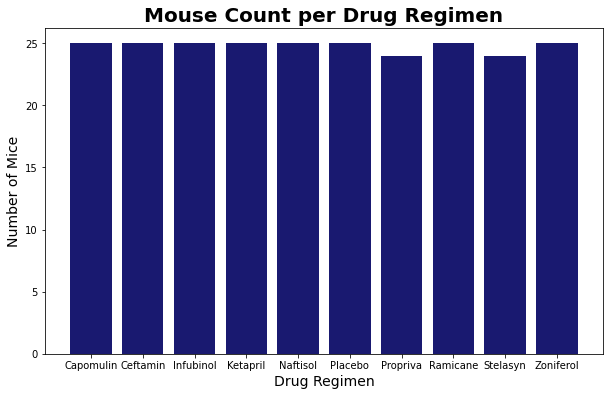

In [16]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

plt.figure(figsize=(10,6))
plt.bar(tested["Drug Regimen"], tested.Mouse_Count, color="midnightblue")

plt.title("Mouse Count per Drug Regimen", fontsize=20, fontweight="bold")
plt.xlabel("Drug Regimen", fontsize=14)
plt.ylabel("Number of Mice", fontsize=14)

plt.show()


In [58]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [60]:
gender = combined_clean.loc[:, ["Mouse ID", "Sex"]].drop_duplicates()
gender.head()

,Mouse ID,Sex
0,b128,Female
1,f932,Male
2,g107,Female
3,a457,Female
4,c819,Male


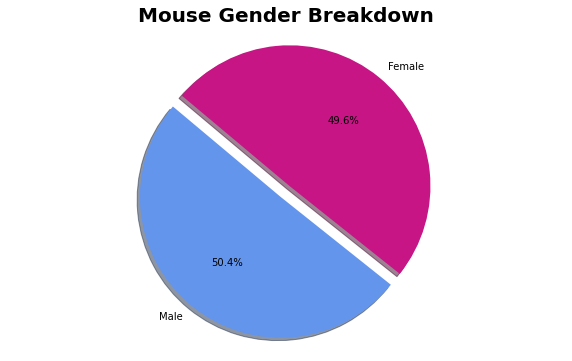

In [67]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pies = gender.Sex.value_counts().index
pie_votes = gender.Sex.value_counts().values
colors = ["cornflowerblue", "mediumvioletred"]
explode = (0,0.1)

 # Tell matplotlib to create a pie chart based upon the above data
plt.figure(figsize=(10,6))
plt.pie(pie_votes, explode=explode, labels=pies, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

plt.title("Mouse Gender Breakdown", fontsize=20, fontweight="bold")
plt.show()

In [87]:
capo_only_df = combined_clean.loc[combined_clean["Drug Regimen"] == "Capomulin"]
capo_only_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
224,j246,0,45.000000,0,Capomulin,Female,21,21
225,r554,0,45.000000,0,Capomulin,Female,8,17
226,s185,0,45.000000,0,Capomulin,Female,3,17
227,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1841,s710,45,40.728578,1,Capomulin,Female,1,23
1846,j119,45,38.125164,1,Capomulin,Female,7,23
1865,i557,45,47.685963,1,Capomulin,Female,1,24
1875,r944,45,41.581521,2,Capomulin,Male,12,25


In [94]:
capo_only_df = combined_clean.loc[combined_clean["Drug Regimen"] == "Capomulin"]
rami_only_df = combined_clean.loc[combined_clean["Drug Regimen"] == "Ramicane"]
infu_only_df = combined_clean.loc[combined_clean["Drug Regimen"] == "Infubinol"]
ceft_only_df = combined_clean.loc[combined_clean["Drug Regimen"] == "Ceftamin"]



In [98]:
ceft_only_df2 = ceft_only_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]



ceft_only_df2

# hey_arnold_alphabetical_df = hey_arnold_renamed_df[[
#     "Character", "Football Head", "Hair Color", "Height"]]

# hey_arnold_alphabetical_df

,Mouse ID,Timepoint,Tumor Volume (mm3)
168,x822,0,45.000000
169,l558,0,45.000000
170,l733,0,45.000000
171,f436,0,45.000000
172,l490,0,45.000000
...,...,...,...
1845,k210,45,68.923185
1849,x822,45,61.386660
1851,l733,45,64.299830
1859,o287,45,59.741901


## Quartiles, Outliers and Boxplots

In [101]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 
# Capomulin, Ramicane, Infubinol, and Ceftamin

drugs1 = capo_only_df.groupby("Mouse ID")["Timepoint"].max()
# drugs2 = combined_clean.groupby("Mouse ID")["Tumor Volume (mm3)"].median()
# drugs3 = combined_clean.groupby("Mouse ID")["Tumor Volume (mm3)"].var()
# drugs4 = combined_clean.groupby("Mouse ID")["Tumor Volume (mm3)"].std()
# drugs5 = combined_clean.groupby("Mouse ID")["Tumor Volume (mm3)"].sem()
drugs6 = capo_only_df.groupby("Mouse ID")["Tumor Volume (mm3)"].max()
regimen1 = pd.DataFrame([ drugs1, drugs6]).T
regimen1.columns = ["Max Timepoint", "Tumor Volume (mm3)" ]
regimen1



# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint




,Max Timepoint,Tumor Volume (mm3)
Mouse ID,,
b128,45.0,45.651331
b742,45.0,45.000000
f966,20.0,45.000000
g288,45.0,46.304003
g316,45.0,46.809225
i557,45.0,47.685963
i738,45.0,45.595685
j119,45.0,48.158209
j246,35.0,46.408361


In [19]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

combined_2 = pd.merge(combined_clean, regimen1, how="left", on="Mouse ID")
combined_2.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Max Timepoint
0,b128,0,45.0,0,Capomulin,Female,9,22,45
1,f932,0,45.0,0,Ketapril,Male,15,29,0
2,g107,0,45.0,0,Ketapril,Female,2,29,35
3,a457,0,45.0,0,Ketapril,Female,11,30,10
4,c819,0,45.0,0,Ketapril,Male,21,25,40
5,h246,0,45.0,0,Ketapril,Male,13,30,45
6,p189,0,45.0,0,Ketapril,Male,8,28,45
7,n923,0,45.0,0,Ketapril,Male,19,30,40
8,q119,0,45.0,0,Ketapril,Male,17,30,10
9,f993,0,45.0,0,Naftisol,Male,21,28,20


In [20]:
correlation = combined_2.corr()
correlation

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g),Max Timepoint
Timepoint,1.000000,0.443380,0.646026,0.015173,-0.086472,0.377516
Tumor Volume (mm3),0.443380,1.000000,0.533806,0.039755,0.588128,0.121680
Metastatic Sites,0.646026,0.533806,1.000000,0.057422,0.172617,0.251027
Age_months,0.015173,0.039755,0.057422,1.000000,0.003923,0.040191
Weight (g),-0.086472,0.588128,0.172617,0.003923,1.000000,-0.229056
Max Timepoint,0.377516,0.121680,0.251027,0.040191,-0.229056,1.000000


In [33]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [34]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [83]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
plt.line(combined.Tumor_Volume_(mm3), combined.Timepoint)

plt.plot(combined[Tumor_Volume_(mm3)]', results.fittedvalues, "r-")

plt.annotate("y = 0.14x - 29.5",(600, 100), fontsize=15,color="red")

plt.xlabel('Tumor Volume')
plt.ylabel('Timepoint')
print(f"The r-squared is: {results.rsquared}")
plt.show()

SyntaxError: EOL while scanning string literal (<ipython-input-83-aa66b6ace582>, line 4)

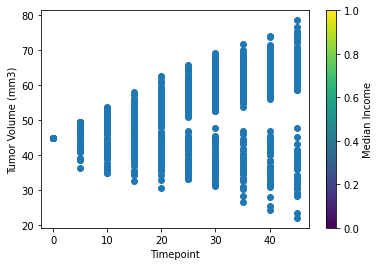

In [70]:
plt.scatter(combined2['Timepoint'],combined2['Tumor Volume (mm3)'],c=combined2['Tumor Volume (mm3)'])
clb = plt.colorbar()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
clb.set_label("Median Income")
plt.show()

In [56]:
regimen1.Timepoint(kind="line", facecolor="red")

AttributeError: 'DataFrame' object has no attribute 'Timepoint'

In [82]:
capomulin = combined2['Drug Regimen': 'Capomulin'].count
capomulin
# attacker_data = got_data["attacker_king"].value_counts()

TypeError: cannot do slice indexing on Int64Index with these indexers [Drug Regimen] of type str

In [ ]:
tumor_capo = rain_df[["Drug Regimen","Tumor Volume (mm3)"]]

# Set the index to be "State" so they will be used as labels
tumor_capo = tumor_capo.set_index("State")

state_and_inches.head()

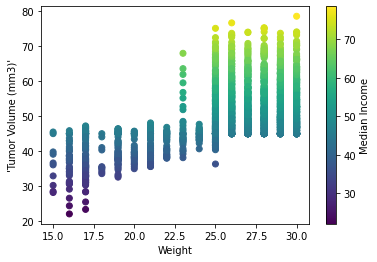

In [77]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# im clearly going off the rails here and researching code isnt getting me there at this point.

capo = combined

plt.scatter(combined2['Weight (g)'],combined2['Tumor Volume (mm3)'],c=combined2['Tumor Volume (mm3)'])
clb = plt.colorbar()
plt.xlabel("Weight")
plt.ylabel("'Tumor Volume (mm3)'")
clb.set_label("Median Income")
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [54]:
# feature = combined_2[["Weight (g)"]]
# target = combined_2["Timepoint]
                    
               
combined["Timepoint"] = combined.Timepoint
combined["Runs_Allowed"] = combined.Weight (g)
combined.head()
                    
                    
                    

SyntaxError: invalid syntax (<ipython-input-54-1dcc32f833c2>, line 6)

In [39]:
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

NameError: name 'feature' is not defined

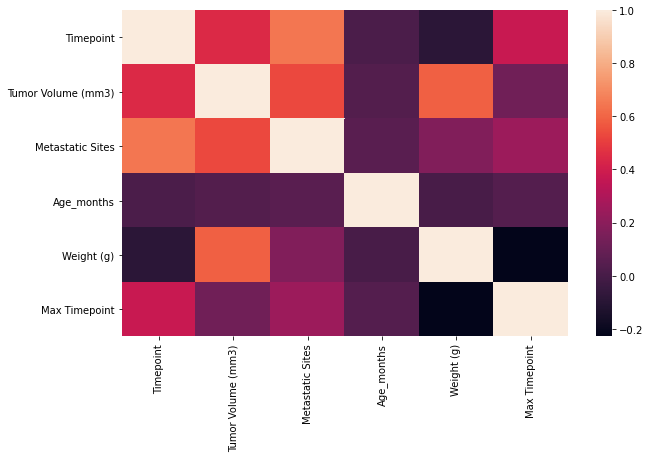

In [40]:
# just extra stuff here 
plt.figure(figsize=(10,6))
sn.heatmap(correlation)
plt.show()